In [1]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]


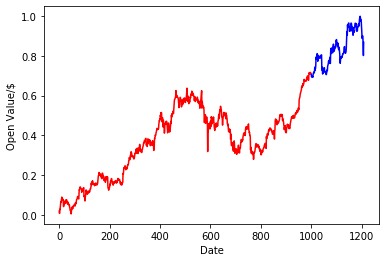

In [3]:
from matplotlib import pyplot as plt

#test_x_range is an array of values between 1000-1208
test_x_range=np.arange(1000,1209,1)


plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()


In [4]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

Using TensorFlow backend.


In [5]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/200
900/900 [==============================] - 10s 11ms/step - loss: 0.0184 - val_loss: 0.0055
Epoch 2/200
900/900 [==============================] - 8s 8ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 3/200
900/900 [==============================] - 7s 8ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 4/200
900/900 [==============================] - 8s 9ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 5/200
900/900 [==============================] - 7s 8ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 6/200
900/900 [==============================] - 7s 8ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 7/200
900/900 [==============================] - 7s 8ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/200
900/900 [==============================] - 7s 8ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 9/200
900/900 [==============================] - 7s 8ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/200
900/900 [=====================

900/900 [==============================] - 8s 9ms/step - loss: 7.3906e-04 - val_loss: 6.5938e-04
Epoch 79/200
900/900 [==============================] - 8s 9ms/step - loss: 7.3564e-04 - val_loss: 0.0012
Epoch 80/200
900/900 [==============================] - 7s 8ms/step - loss: 7.5421e-04 - val_loss: 6.8300e-04
Epoch 81/200
900/900 [==============================] - 8s 8ms/step - loss: 8.1073e-04 - val_loss: 1.7478e-04
Epoch 82/200
900/900 [==============================] - 7s 8ms/step - loss: 6.9658e-04 - val_loss: 5.4571e-04
Epoch 83/200
900/900 [==============================] - 7s 8ms/step - loss: 6.8430e-04 - val_loss: 2.8467e-04
Epoch 84/200
900/900 [==============================] - 7s 8ms/step - loss: 7.5260e-04 - val_loss: 0.0016
Epoch 85/200
900/900 [==============================] - 7s 8ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 86/200
900/900 [==============================] - 7s 8ms/step - loss: 7.6793e-04 - val_loss: 1.6181e-04
Epoch 87/200
900/900 [=================

900/900 [==============================] - 7s 8ms/step - loss: 6.2041e-04 - val_loss: 2.1928e-04
Epoch 153/200
900/900 [==============================] - 7s 8ms/step - loss: 5.7476e-04 - val_loss: 8.6910e-04
Epoch 154/200
900/900 [==============================] - 7s 8ms/step - loss: 6.2619e-04 - val_loss: 6.1309e-04
Epoch 155/200
900/900 [==============================] - 8s 9ms/step - loss: 4.9655e-04 - val_loss: 2.9325e-04
Epoch 156/200
900/900 [==============================] - 8s 9ms/step - loss: 5.2468e-04 - val_loss: 1.3105e-04
Epoch 157/200
900/900 [==============================] - 8s 9ms/step - loss: 6.0218e-04 - val_loss: 1.1434e-04
Epoch 158/200
900/900 [==============================] - 8s 9ms/step - loss: 5.8074e-04 - val_loss: 2.5417e-04
Epoch 159/200
900/900 [==============================] - 8s 8ms/step - loss: 5.2660e-04 - val_loss: 8.9569e-05
Epoch 160/200
900/900 [==============================] - 8s 9ms/step - loss: 4.8813e-04 - val_loss: 3.4395e-04
Epoch 161/200
9

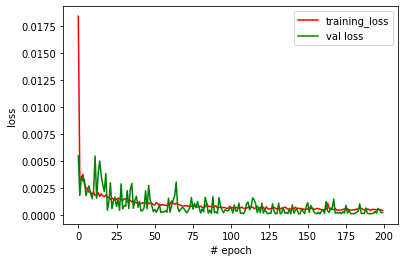

In [6]:
plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.7682780690269874


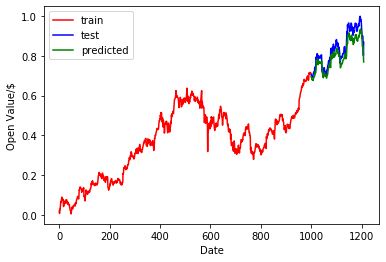

In [9]:
#test_x_range is an array of values between 1000-1208
test_x_range=np.arange(1000,1209,1)


plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()